In [3]:
import sys
sys.path.append("..") # import one subdirectory up in files

# standard imports
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time as time
import pickle
import random

# 3rd party packages
import qiskit as qk
import qiskit.providers.aer.noise as noise
#import networkx as nx
import tenpy as tp

# custom
from networks.networks import IsoMPS
from networks.isonetwork import QKParamCircuit
import circuits.basic_circuits as circuits

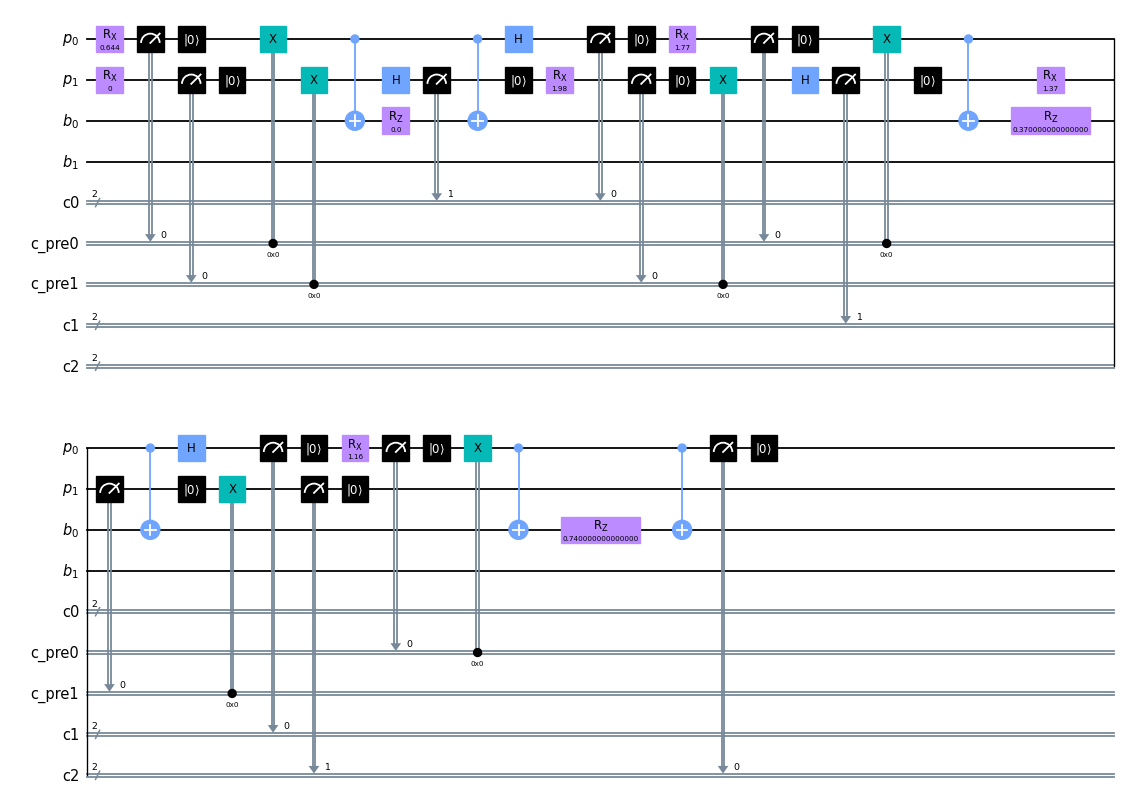

In [4]:
import numpy as np
import qiskit as qk
import networkx as nx

#%% qiskit debugging
nphys = 2
nbond = 2
l_uc = 3

# setup registers
preg = qk.QuantumRegister(nphys,'p')
breg = qk.QuantumRegister(nbond,'b')
qregs = [preg,breg]
cregs = [qk.ClassicalRegister(nphys,'m'+str(j)) for j in range(l_uc)]

# setup variational parameters
nvp = 3 # number of variational parameters
plabels = [qk.circuit.Parameter('x'+str(j))for j in range(nvp)]
pvals = 0.37*np.arange(l_uc)
paramdict = dict(zip(plabels,pvals))
# setup some arbitrary circuit for each node
# (same architecture for each node, different parameter value(s))
# create list of circuits for each site
circs=[qk.QuantumCircuit() for j in range(l_uc)]
for j in [2,0,1]:#range(L):
    for reg in qregs: circs[j].add_register(reg)
    circs[j].cx(preg[0],breg[0])
    circs[j].rz(plabels[j],breg[0])
    circs[j].cx(preg[0],breg[0])
    
# convert to parameterized circuits
pcircs = []
for j in range(l_uc):
    pcircs += [QKParamCircuit(circs[j],[plabels[j]])]
    
#%% HoloMPS
psi_mps = IsoMPS(preg,breg,pcircs,thermal = True, thermal_prob = [[[0.1,0,2],[0.6,0.7],[0.3,0.4]]],bases=['xxz'])
psi_mps.construct_circuit(paramdict).draw('mpl',scale=0.9)